In [3]:
import pandas as pd
import numpy as np
import random as rnd

import warnings # current version generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

### Pandas

In [4]:
#1. Read the provided CSV file ‘data.csv’. 

data = pd.read_csv("C:\\Users\\rnare\\Downloads\\data.csv")
data.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [5]:
# 2. Show the basic statistical description about the data. 

data.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [6]:
# 3.Check if the data has null values

df = pd.DataFrame(data)

print(df.isnull().sum())


Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [27]:
# 3a.  Replace the null values with the mean 

mean_value=df['Calories'].mean()
df['Calories'].fillna(value=mean_value,inplace=True)
df

,Duration,Pulse,Calories
0,60,110,409
1,60,117,479
2,60,103,340
3,45,109,282
4,45,117,406
...,...,...,...
164,60,105,290
165,60,110,300
166,60,115,310
167,75,120,320


In [8]:
# 4.Select at least two columns and aggregate the data using: min, max, count, mean. 

agg_data = df[['Pulse','Maxpulse']].agg(['min','max','count','mean'])

print(agg_data)

            Pulse    Maxpulse
min     80.000000  100.000000
max    159.000000  184.000000
count  169.000000  169.000000
mean   107.461538  134.047337


In [9]:
# 5.Filter the dataframe to select the rows with calories values between 500 and 1000.

df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]


,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [10]:
# 6. Filter the dataframe to select the rows with calories values > 500 and pulse < 100.

df[(df['Calories']>500) & (df['Pulse']<100)]


,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [11]:
# 7. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”. 

df_modified= df.drop("Maxpulse",axis=1)
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [12]:
# 8. Delete the “Maxpulse” column from the main df dataframe 
df= df.drop("Maxpulse",axis=1)
df

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [13]:
# 9. Convert the datatype of Calories column to int datatype.

df['Calories'] = df['Calories'].astype(int)
df.dtypes

Duration    int64
Pulse       int64
Calories    int32
dtype: object

<Axes: xlabel='Duration', ylabel='Calories'>

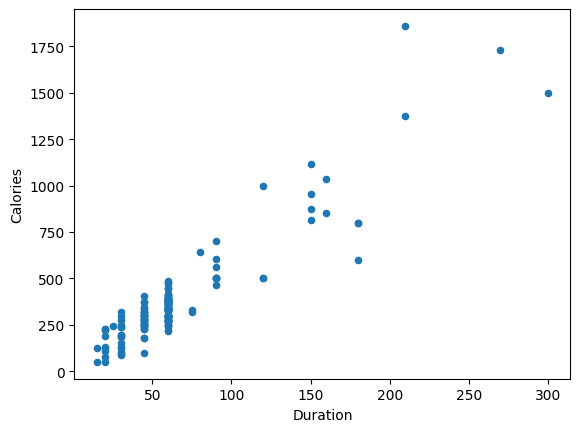

In [14]:
# 10. Using pandas create a scatter plot for the two columns (Duration and Calories). 
df.plot.scatter( x = 'Duration', y = 'Calories')

### Glass Dataset

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [16]:
# 1. Implement Naïve Bayes method using scikit-learn library. 

glass = pd.read_csv("C:\\Users\\rnare\\Downloads\\glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [17]:
glass.corr().style.background_gradient(cmap="Greens")

# cmap indicates the correlation matrix for the coulmns in dataset

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [18]:
x=glass.iloc[:,:-1].values
y=glass['Type'].values

In [19]:
# 1b. Use train_test_split to create training and testing part. 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.30, random_state = 0)

In [31]:
# Evaluating the model on testing part using score and
# 1. Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

# GaussianNB()- function creates an instance of the Gaussian Naive Bayes classifier,
# fit()- train the classifier on x_train and y_train data
# predict() -predicts the x_test data and stores in y_pred
# classification_report()- generate a summary of the predictions made by the classifier, including precision, recall, and F1-score for each class, as well as an overall accuracy score.
# confusion_matrix() generates a confusion matrix that summarizes the number of TP, FP, TN, FN for each class
# accuracy_score()- accuracy of the classifier by comparing the predicted values y_pred with true values y_test

Classification Report:
              precision    recall  f1-score   support

           1       0.39      0.86      0.54        21
           2       0.50      0.12      0.19        26
           3       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       0.88      1.00      0.93         7

    accuracy                           0.46        65
   macro avg       0.41      0.50      0.41        65
weighted avg       0.44      0.46      0.37        65

accuracy is 0.46153846153846156


In [21]:
#Multi nomial NaiveBayes and GaussianNaiveBayes gives accurate values in Naive Bayes

In [30]:
#1. Implement linear SVM method using scikit library
#      a. Use the glass dataset available
# Support Vector Machine's 
from sklearn.svm import SVC, LinearSVC

classifier = LinearSVC()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

# LinerSVC()- Linear support vector classifier

Classification Report:
              precision    recall  f1-score   support

           1       0.45      1.00      0.62        21
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00         7
           5       0.25      1.00      0.40         2
           6       0.00      0.00      0.00         2
           7       0.78      1.00      0.88         7

    accuracy                           0.46        65
   macro avg       0.25      0.50      0.32        65
weighted avg       0.24      0.46      0.31        65

accuracy is 0.46153846153846156


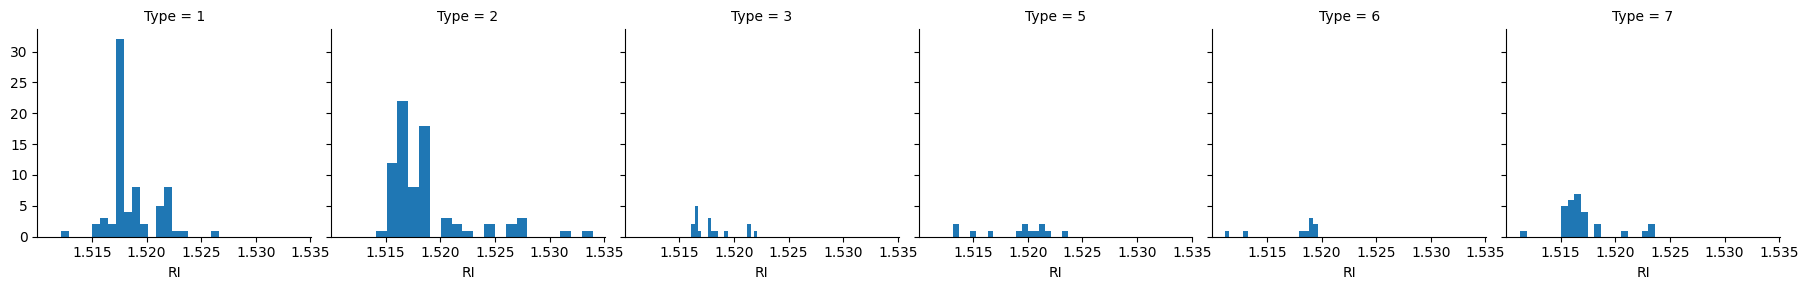

In [23]:
# Do at least two visualizations to describe or show correlations in the Glass Dataset
g = sns.FacetGrid(glass, col='Type')
g.map(plt.hist,'RI',bins=20)

# Creates a FaceGrid based on glass DataFrame, specifies that grid should be divided into columns based on 'Type'
# plots a histogram on each grid cell showing the distrcibution of 'RI' variable within each 'Type' group and 20 bins are used

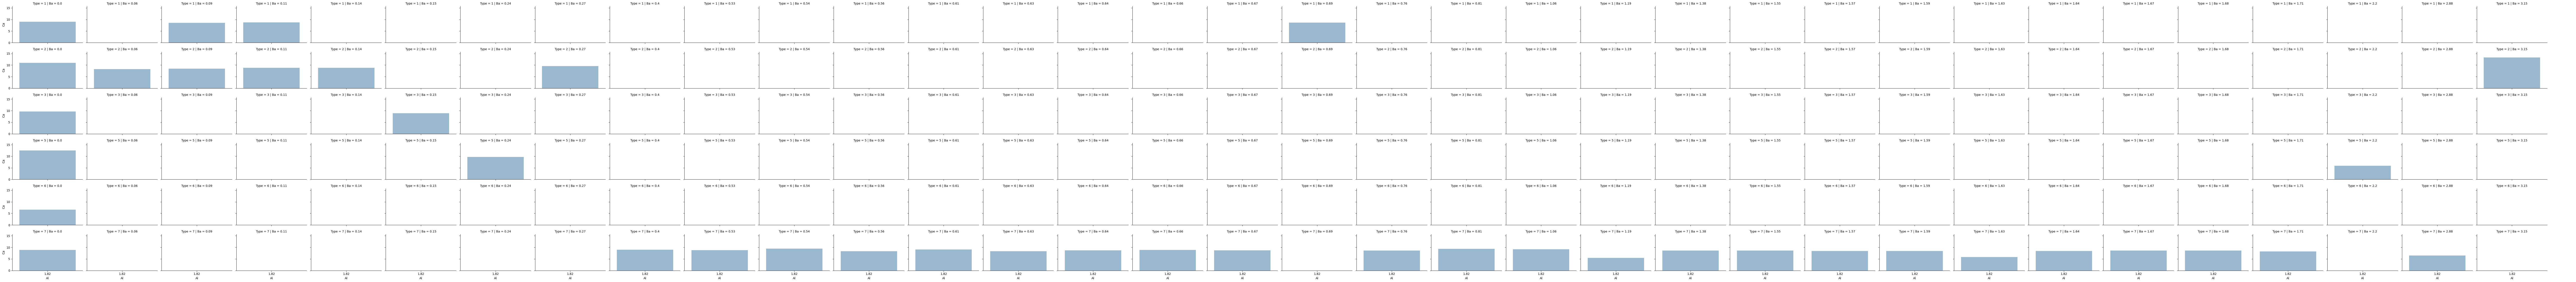

In [24]:
grid = sns.FacetGrid(glass, row='Type',col='Ba',height=2.2,aspect=1.6)
grid.map(sns.barplot,'Al','Ca',alpha=.5,ci=None)
grid.add_legend()


In [25]:
#Which algorithm you got better accuracy? Can you justify why?
Gaussian Naive Bayes algorithm gives better accuracy than other algorithms. This is used when features are not discrete.